In [2]:
using Pkg
Pkg.instantiate()

   Installed AliasTables ─── v1.1.1
   Installed Libgcrypt_jll ─ v1.8.11+0
   Installed Libmount_jll ── v2.40.0+0
   Installed Libuuid_jll ─── v2.40.0+0
   Installed FillArrays ──── v1.10.2
Precompiling project...
  ✓ AliasTables
  ✓ Libuuid_jll
  ✓ Libmount_jll
  ✓ FillArrays
  ✓ Libgcrypt_jll
  ✓ XSLT_jll
  ✓ Fontconfig_jll
  ✓ FillArrays → FillArraysPDMatsExt
  ✓ Cairo_jll
  ✓ Qt6Base_jll
  ✓ FillArrays → FillArraysSparseArraysExt
  ✓ HarfBuzz_jll
  ✓ FillArrays → FillArraysStatisticsExt
  ✓ libass_jll
  ✓ FFMPEG_jll
  ✓ FFMPEG
  ✓ GR_jll
  ✓ GR
  ✓ Distributions
  ✓ Distributions → DistributionsTestExt
  ✓ Plots
  ✓ Plots → UnitfulExt
  22 dependencies successfully precompiled in 130 seconds. 145 already precompiled.


In [3]:
using Distributions
using Plots

# Binomial general info

# Binomial PMF

A Binomial PMF is 
${n\choose x}p^{x}q^{(n-x)}$, where ${n\choose x}=\frac{n!}{x!(n-x)!}$ is the binomial coefficient,\
where $n$ is the total number of objects in the set and $x$ the number of choosing objects from the set,\
and where $p$ is probability of success on a single trial, and $q = (1-p)$ and is the probability of failure on a single trial\
$n$ can also be seen as the number of trials.

In [27]:
function binom_pmf(x:: Int, n:: Int, p:: Number):: Number
    combs = factorial(n) / (factorial(x) * factorial(n - x))
    combs * p^(x) * (1 - p)^(n - x)
end

binom_pmf (generic function with 3 methods)

## Using the PMF to get the probability of each number of events happening:

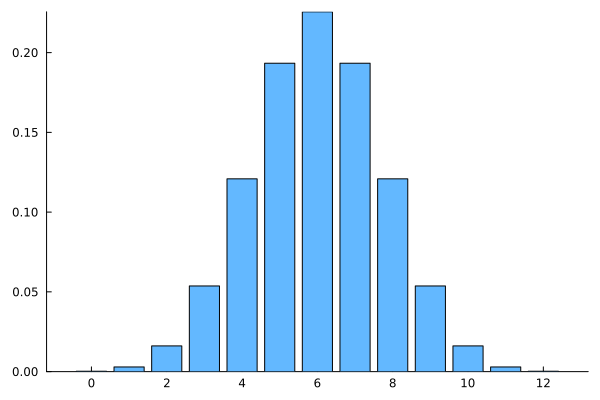

In [28]:
# The next plot will give you the probability of x events of one type happen (remember that there can only be 2 possible event types in a binomial) 
# if we take 12 total events with probability of 0.5 of the desired event type

events = [0:12;]
probs = binom_pmf.(events, 12, 0.5)

plot(
    bar(events, probs, fillcolor=:steelblue1, legend=false, grid=false)
)

## Using the built-in Binomial function

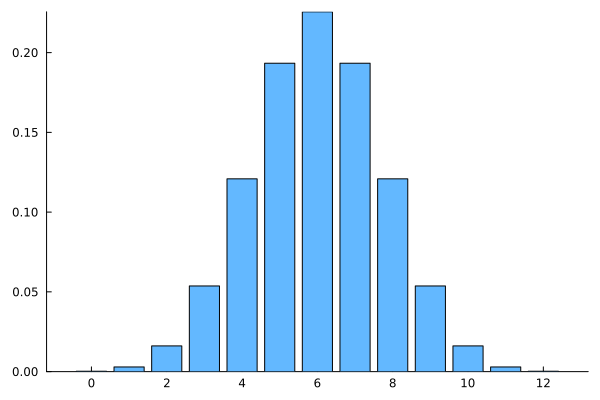

In [20]:
events = [0:12;]
model = Binomial(12, 0.5)

probs = pdf.(model, events)

plot(
    bar(events, probs, fillcolor=:steelblue1, legend=false, grid=false)
)

Notes:
- We can see that PMF takes the number events and outputs the probability of that many events happening given the assumed model (here a binomial model)

## Multiple probabilities

In [38]:
events = [0:12;]
probs_desired = [0.1, 0.3, 0.6, 0.9]
models = Binomial.(12, probs_desired)

# this dot applies to the events element wise, then the list comprehension applies probs element-wise as well, but without flattening the vector, as we intend
probs = [binom_pmf.(events, 12, prob) for prob in probs_desired]
probs

4-element Vector{Vector{Float64}}:
 [0.2824295364810001, 0.3765727153080001, 0.2301277704660001, 0.08523250758000005, 0.02130812689500001, 0.0037881114480000015, 0.0004910514840000002, 4.676680800000002e-5, 3.2476950000000016e-6, 1.6038000000000012e-7, 5.346000000000004e-9, 1.0800000000000007e-10, 1.0000000000000006e-12]
 [0.01384128720099999, 0.07118376274799995, 0.1677902979059999, 0.23970042557999985, 0.2311396960949999, 0.1584957916079999, 0.07924789580399996, 0.029111471927999982, 0.007797715694999996, 0.0014852791799999992, 0.00019096446599999988, 1.4880347999999992e-5, 5.314409999999998e-7]
 [1.677721600000001e-5, 0.00030198988800000015, 0.0024914165760000014, 0.012457082880000005, 0.042042654720000024, 0.10090237132800002, 0.17657914982400003, 0.227030335488, 0.21284093951999997, 0.14189395968, 0.06385228185599999, 0.017414258687999992, 0.002176782335999999]
 [9.999999999999974e-13, 1.0799999999999974e-10, 5.345999999999989e-9, 1.603799999999997e-7, 3.247694999999994e-6, 4.6766

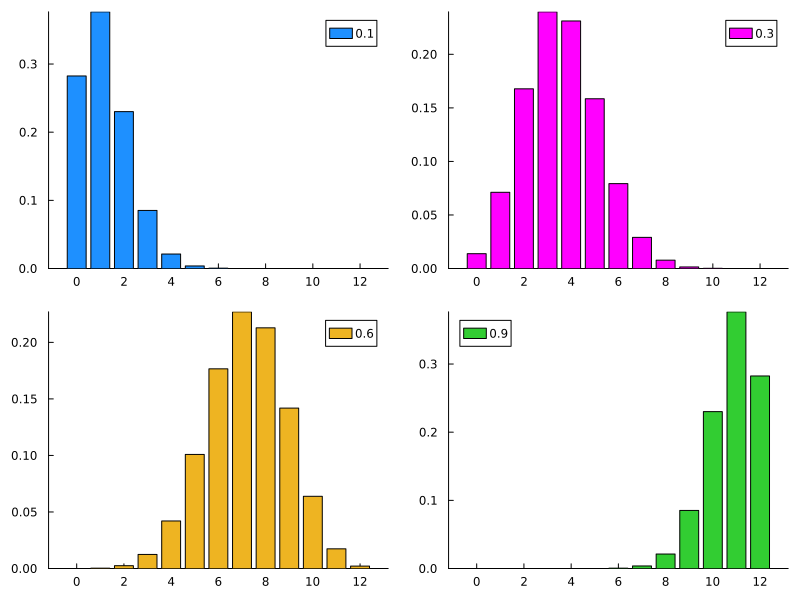

In [39]:
probs_mtx = reshape(probs_desired, 1, 4)
plot(
    bar(
        events, probs,
        fillcolor=[:dodgerblue :magenta :goldenrod2 :limegreen],
        legend=true,
        grid=false,
        layout=grid(2,2),
        # link=:y,
        label=probs_mtx,
        size=(800, 600)
    )
)

Notes:
- Larger probabilities makes distribution shift to the right